In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('/Users/mille/Desktop/CA_pop.csv')



DRILL: 
    
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1) Choose one variable and plot that variable four different ways. 

2) Choose two continuous variables, and plot them three different ways.

3) Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

Data set: 16.0 MB
Data set shape: (474125, 7)

https://data.ca.gov/dataset/california-population-projection-county-age-gender-and-ethnicity

In [3]:
df.head()

,fips,county,year,age,pop_female,pop_male,pop_total
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


1) Choose one variable and plot that variable four different ways.


For the first problem I selected pop_total as the one variable. 

Creating a variables for San Francisco and Los Angeles. 

In [4]:
ct = df.groupby(['county']).get_group('SAN FRANCISCO')


dt = ct.groupby(['year']).get_group(2017)



In [5]:
la = df.groupby(['county']).get_group('LOS ANGELES')


lal = la.groupby(['year']).get_group(2017)

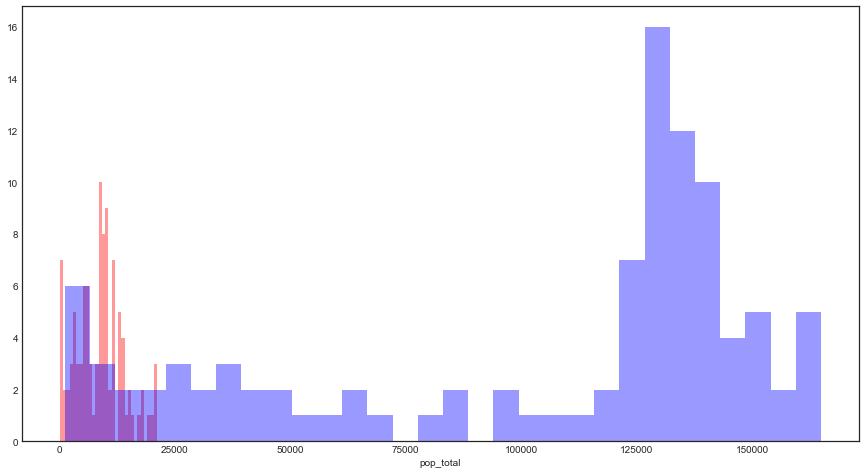

In [6]:
plt.subplots(figsize=(15,8))

sns.distplot(dt['pop_total'],bins=30,kde=False,color='red')
sns.distplot(lal['pop_total'],bins=30,kde=False,color='blue')

Above: Plot 1 (Problem 1): 

Seaborn distplot of San Francisco (red) and Los Angeles (blue) for population totals. 

Pro: Easy way to visualize the population total distrubtions of two cities. 
Con: When comparing to different sizes in population the distrutions looked skewed. 

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


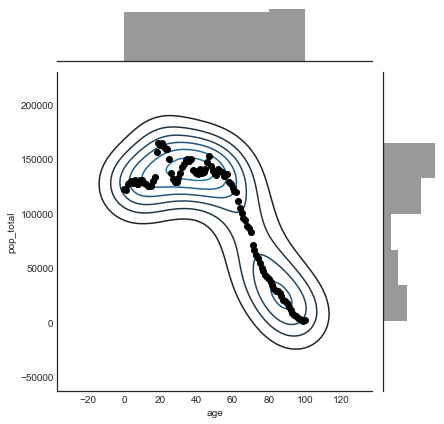

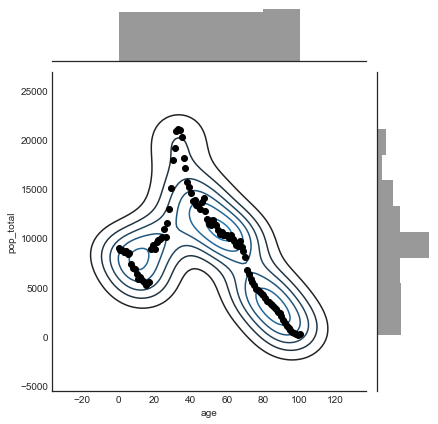

In [7]:
g = (sns.jointplot("age", "pop_total", data=lal, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
g = (sns.jointplot("age", "pop_total", data=dt, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

Above Plot 2 (Problem 1): 
    
Seaborn jointplots the top plot is Los Angeles (lal) and bottom plot is San Francisco (dt). The contour lines with histograms show on the population total is distributed by age in each plot. San Francisco shows a peak in the population total 35-40 age range, this is likely related to the tech industry. 

Pro: Visually it is a nice way to see how the data is distrubted. The contour lines help emphasize the areas where data is clustered. 
Con: Depending on the data, the contour lines plus histograms makes this plot too busy. The histograms for age show no change. 

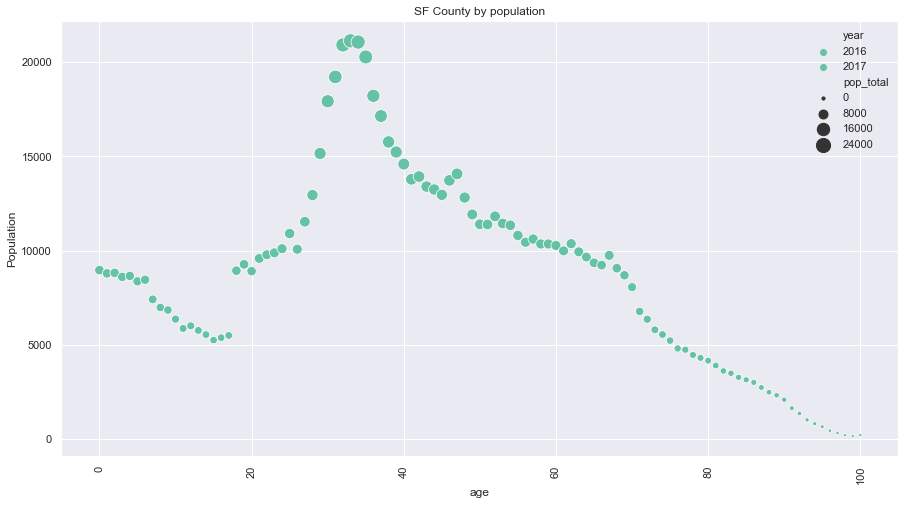

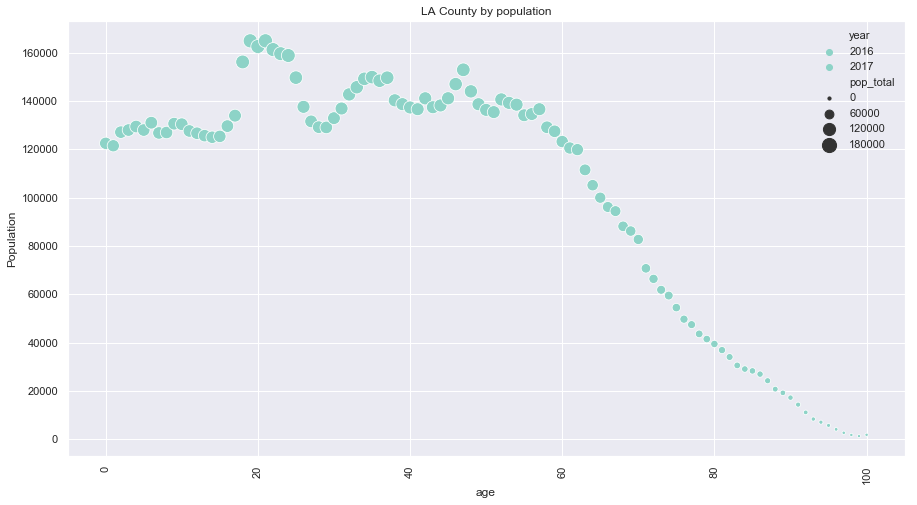

In [8]:
import seaborn as sns
sns.set()

plt.subplots(figsize=(15,8))

cmap = sns.cubehelix_palette(dark=.5, light=.8, as_cmap=True)
ax = sns.scatterplot(x="age", y="pop_total",
                     hue="year", size="pop_total",
                     palette="Set2", sizes=(10, 200),
                     data=dt)

plt.title('SF County by population')
plt.ylabel('Population')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

plt.subplots(figsize=(15,8))
cmap = sns.cubehelix_palette(dark=.5, light=.8, as_cmap=True)
ax = sns.scatterplot(x="age", y="pop_total",
                     hue="year", size="pop_total",
                     palette="Set3", sizes=(10, 200),
                     data=lal)

plt.title('LA County by population')
plt.ylabel('Population')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Above Plot 3 (Problem 1): 
    

Seaborn scatterplot emphasizing the size of data point of highest occurences by age. 

Pro: It is a great way to use a scatterplot using the highest occurences instead of contour lines. 

Con: Need to indicate numbers of occurences vs. high data point values. If the dataset has data with a low standard deviation this type of plot would not be very interesting. 

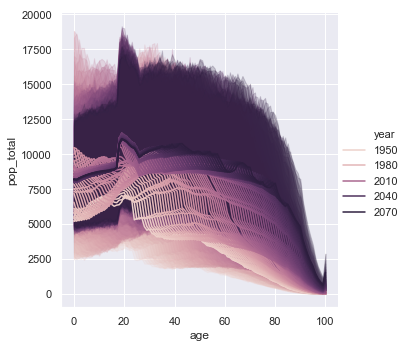

In [9]:
sns.relplot(x="age", y="pop_total", hue="year", kind="line", data=df)


Above Plot 4 (Problem 1):

Seaborn relplot: This is a plot showing the population totals by age over years. 

Pro: Visually it is interesting to look at. 

Con: It is difficult to years by the hue of the purple. There is too much data jammed into this plot. 

________________________________________________________________________________________________________

2) Choose two continuous variables, and plot them three different ways.

pop_female and pop_male 

Text(0.5,1,'LA County')

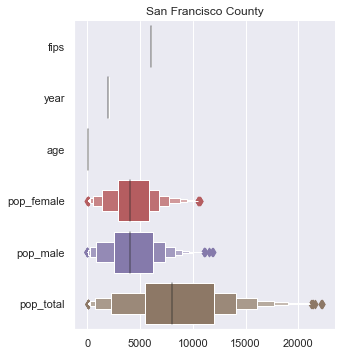

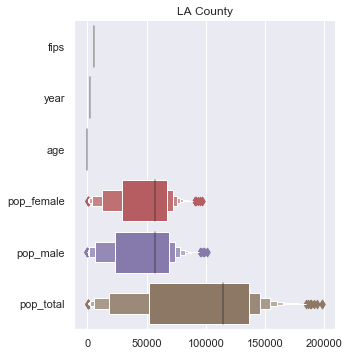

In [10]:
sns.catplot(data=ct, orient="h", kind="boxen")
plt.title('San Francisco County')


sns.catplot(data=la, orient="h", kind="boxen")
plt.title('LA County')


Above Plot 1 (Problem 2): 
    
Seaborn catplot. Very simple way of showing the boxplots using the boxen kind type. 

Pro: Visually it is interesting. It easily displays the data showing the central tendecies and outliers. 

Con: Some people might be confused by the decreasing boxes, show less distributed data in those areas. 

Text(0.5,1,'LA County')

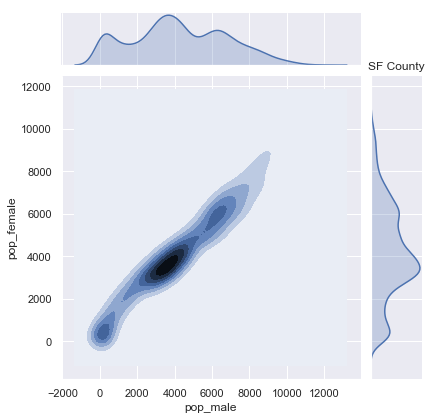

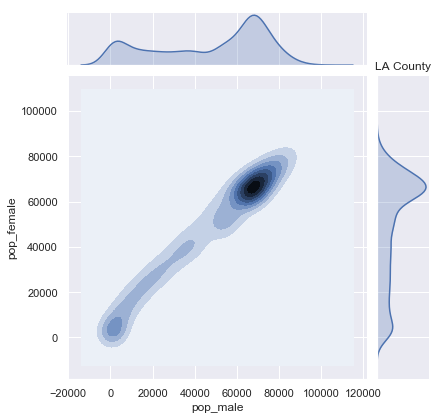

In [11]:
sns.jointplot(x="pop_male", y="pop_female", data=ct, kind="kde");
plt.title('SF County')

sns.jointplot(x="pop_male", y="pop_female", data=la, kind="kde");
plt.title('LA County')


Above Plot 2 (Problem 2):

Comparing sns.jointplot of SF county and LA county. 

Pro: Gives a nice two dimensional shape of the data. If you have a sense of contour maps this type of plot makes a lot of sense illustrating the peaks and valleys of the data. 

Con: It does not give you clear data points. The colored in contours (elevation lines) give the ranges of the data points. This maybe confusing plot to show unless there is good context with the data. 

Text(0.5,1,'LA County')

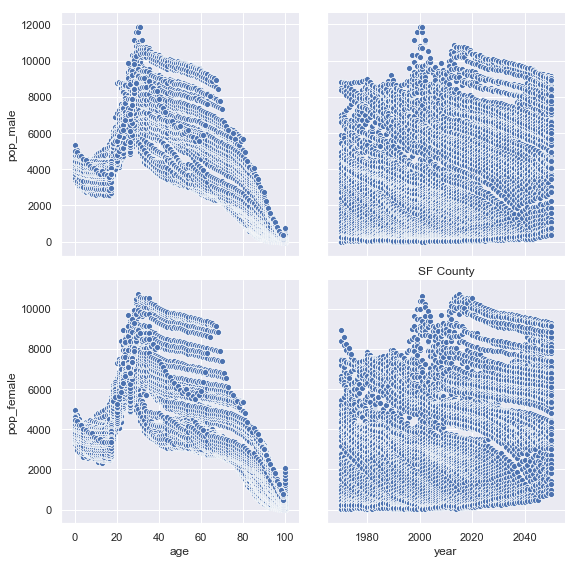

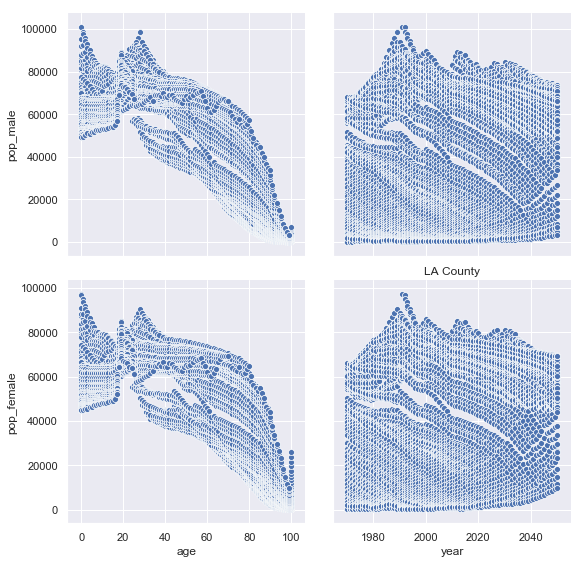

In [12]:
g = sns.pairplot(ct, height=4, 
                 x_vars=["age", "year"],
                 y_vars=["pop_male", "pop_female"])
plt.title('SF County')


g = sns.pairplot(la, height=4, 
                 x_vars=["age", "year"],
                 y_vars=["pop_male", "pop_female"])
plt.title('LA County')


Above Plot 3 (Problem 2):

Comparing SF and LA counties with sns.pairplots. 

Pro: You can compare multiple plots at once. 

Con: When there is a range in the values 

3) Choose one continuous variable and one categorical variable, and plot them six different ways.

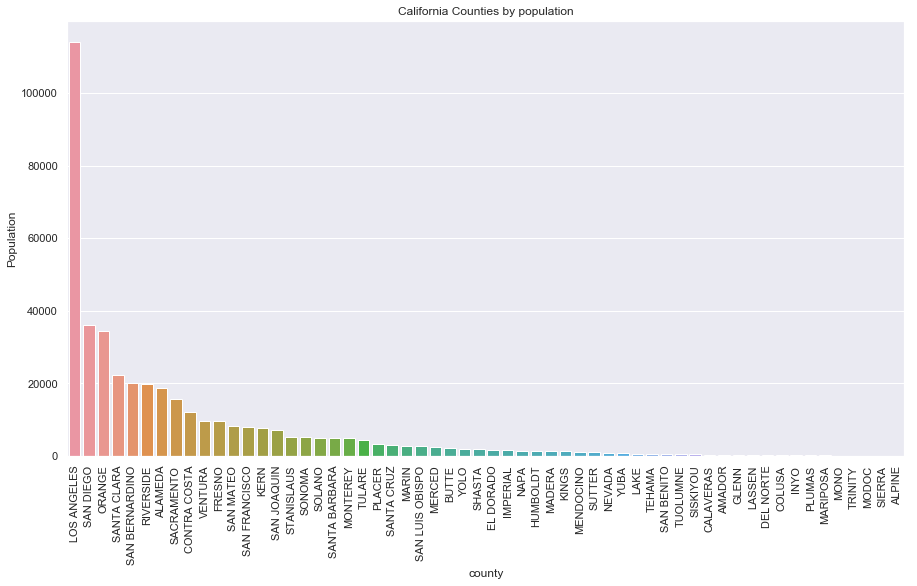

In [32]:
state_col = df[['county','pop_total']].groupby(['county']).median()
state_col = state_col['pop_total'].sort_values(ascending=False)[:58]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('California Counties by population')
plt.ylabel('Population')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Above Plot 1 (Problem 3):

sns.barplot with .sorted method (median) - this figure shows all 58 counties in California by median population. 

Pro: Great way to display all 58 counties in California there median population. 

Con: Los Angeles is 3 times the population of that of the next county. The barplot is skewed heavily to the counties with the highest median population. Problem with this figure is that counties below median of 5000 do not show up on the figure. 



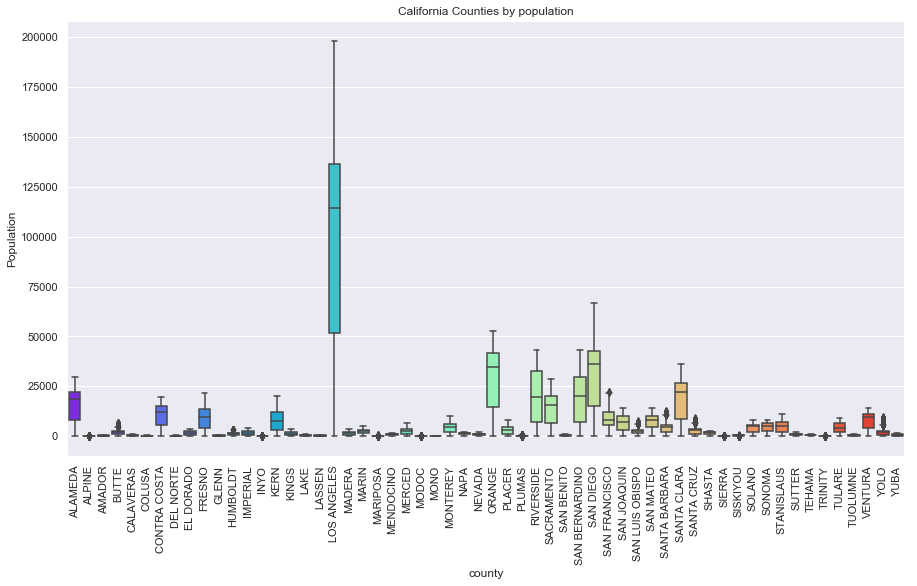

In [14]:

fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='county',y='pop_total',data=df,palette='rainbow')


plt.title('California Counties by population')
plt.ylabel('Population')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Above Plot 2 (Problem 3):

sns.barplot - similar to the figure above however this figure uses box whisker plots. 

Pro: This figure does a great job of showing the population total ranges with central tendencies across all counties. 

Con: The figure is not sorted, so it defaults to alphebetical. It is difficult to see the ranges and central tendencies of the smaller (total population) counties. 

In [48]:
ya = df.groupby(['county']).get_group('YUBA')

ayy=ya[ya.year < 2000]


Text(0.5,1,'Yuba County from 1970-2000')

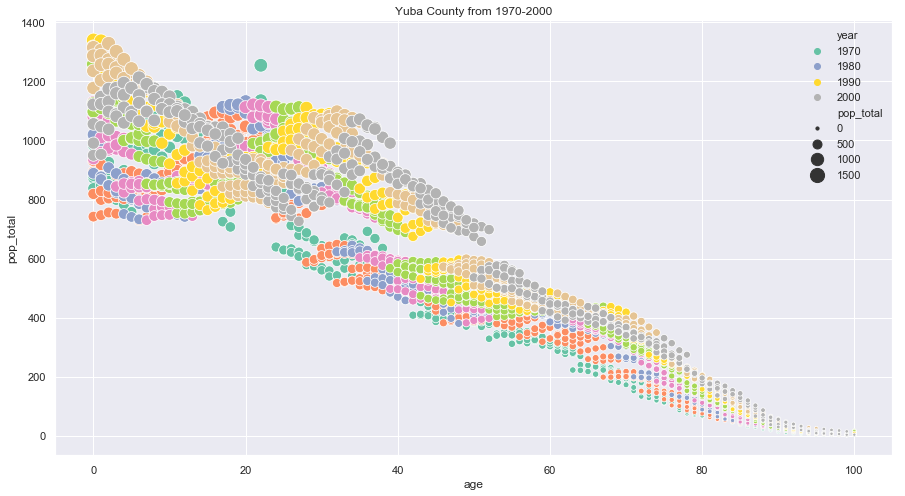

In [50]:
fig,ax = plt.subplots(figsize=(15,8))

cmap = sns.cubehelix_palette(dark=.5, light=.8, as_cmap=True)
ax = sns.scatterplot(x="age", y="pop_total",
                     hue="year", size="pop_total",
                     palette="Set2", sizes=(10, 200),
                     data=ayy)
plt.title('Yuba County from 1970-2000')



Above Plot 3 (Problem 3):

sns.scatterplot using bubble size 

Pro: Visually it is interesting. What works are the bubble sizes to emphasize the higher occurences.

Con: Too busy, there is a lot going on in the graph. With multiple colors, varying bubble sizes, and years overall it is a lot for the audience to digest. 

In [57]:
sf = df.groupby(['county']).get_group('SAN FRANCISCO')

sfo=sf[sf.age < 35]

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


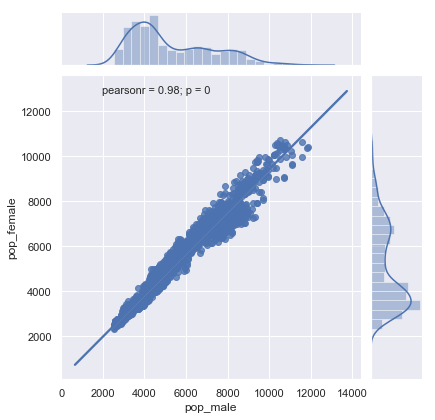

In [61]:
#sfo.boxplot(column=['pop_total'], by=['year'], layout = (3,1), rot=90, fontsize=8, figsize=(15,8))
from scipy import stats
g = sns.jointplot("pop_male", "pop_female", data=sfo, kind="reg")

g = g.annotate(stats.pearsonr)

Above Plot 4 (Problem 3):

sns.jointplot - sorted to ages below 35

Pro: This figure does an excellent job showing a linear relationship, pearsonr value, and histograms. Looking at this figure you can tell immediately there is a strong relationship. 

Con: Stylistically change the background color might help. 

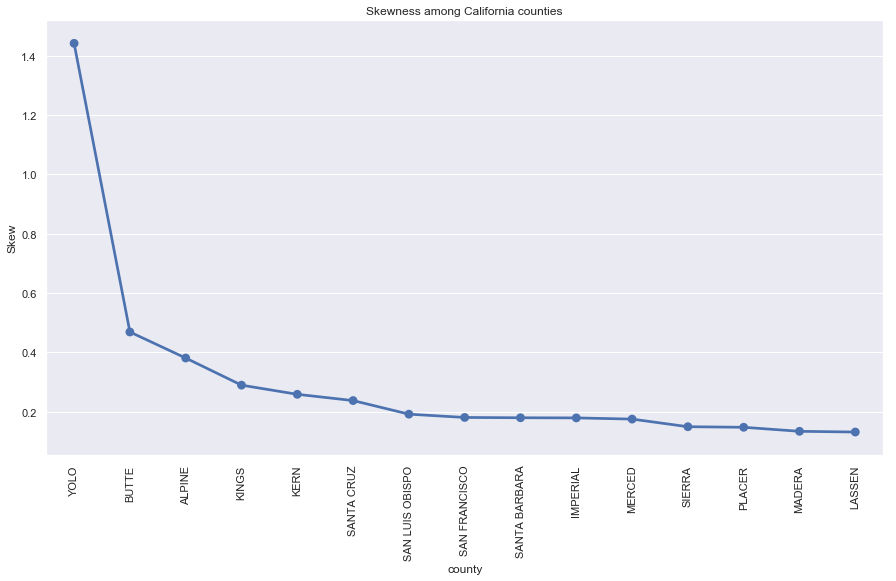

In [17]:
state_col = df[['county','pop_total']].groupby(['county']).skew()
state_col = state_col['pop_total'].sort_values(ascending=False)[:15]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.pointplot(x = state_col_keys,y =state_col_val)

plt.title('Skewness among California counties')
plt.ylabel('Skew')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Above Plot 5 (Problem 3):

sns.pointplot with skew 

Pro: Simple way to show the top 15 counties that have the highest skewness. 

Con: It is simple figure, there could be an issue of confusing the audience how to intrepret the figure. 

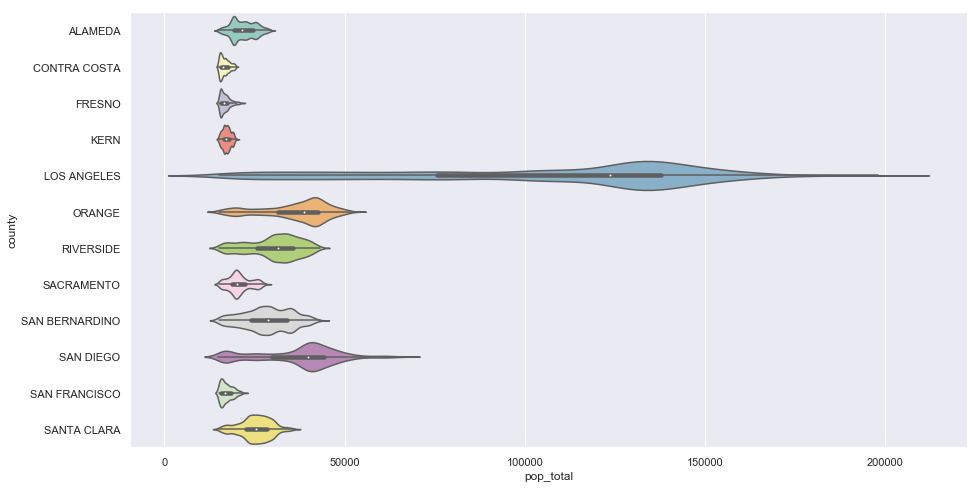

In [18]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.violinplot(x="pop_total", y="county",
                    data=df[df.pop_total > 15000],
                    scale="width", palette="Set3")

Above Plot 6 (problem 3):

sns.violinplot sorted to populations above 15000

Pro: The violinplot is an interesting way to show shape of categorical data. It also catches your eye. 

Con: Questions arise when you look at the figure. What do the shapes mean? Why different colors? This figure brings up questions about how the data is distrubted which is good. 

In [97]:
sf = df.groupby(['county']).get_group('SAN FRANCISCO')

sfo=sf[sf.age < 40]


CHALLENGE: 

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


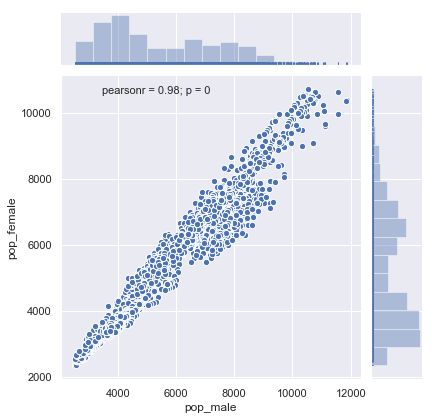

In [98]:
g = sns.jointplot("pop_male", "pop_female", data=sfo,
                  marginal_kws=dict(bins=15, rug=True),
                  annot_kws=dict(stat="r"),
                  s=40, edgecolor="w", linewidth=1)
g = g.annotate(stats.pearsonr)

This figure does a great job of showing the relationship between male and female populations in San Francisco. Including the pearsonr value and histograms on the margins makes this figure very strong. 